In [1]:
!pip install pandas matplotlib scikit-learn yfinance keras tensorflow --quiet


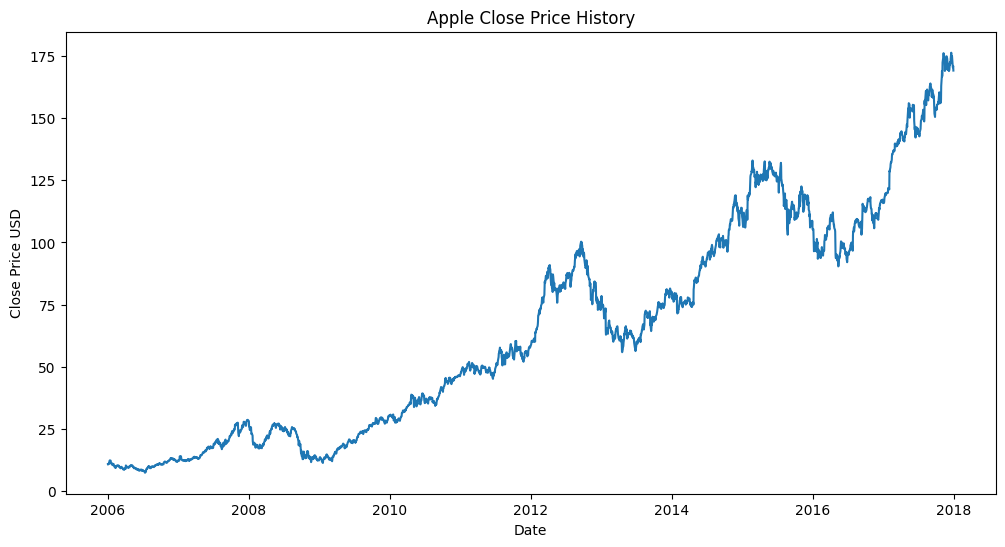

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0295
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 2.5531e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 2.5598e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 2.4197e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 2.4650e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 2.1572e-04
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 2.2791e-04
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1.9723e-04
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 1.9606e-04
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 2.1461e-04
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.7771e-04
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 1.8403e-04
Epoch 13/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 1.8830e-04
Epoch 14/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 2.1130e-04
Epoch 15/20
74/74 ━

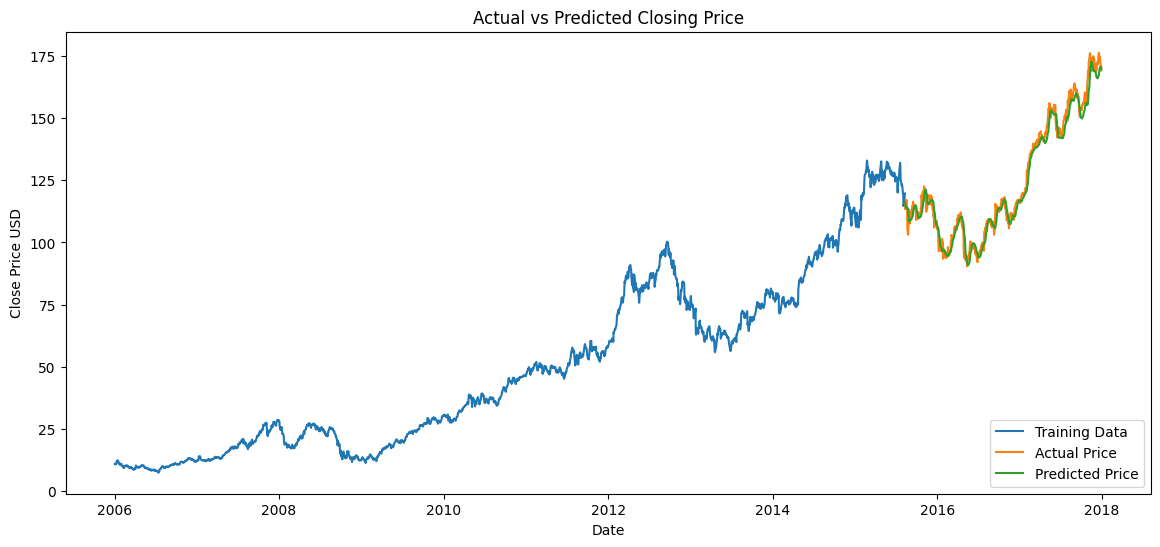

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv('./csv folder/AAPL_2006-01-01_to_2018-01-01.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('Apple Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

data = df.filter(['Close'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

training_data_len = int(np.ceil( len(dataset) * 0.8 ))

train_data = scaled_data[0:int(training_data_len), :]

X_train = []
y_train = []
seq_length = 60

for i in range(seq_length, len(train_data)):
    X_train.append(train_data[i-seq_length:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20)

test_data = scaled_data[training_data_len - seq_length: , :]
X_test = []
y_test = dataset[training_data_len:, :]

for i in range(seq_length, len(test_data)):
    X_test.append(test_data[i-seq_length:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14,6))
plt.title('Actual vs Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Data', 'Actual Price', 'Predicted Price'], loc='lower right')
plt.show()
